In [2]:
import torch
import matplotlib.pyplot as plt

# run pytorch on GPU if cuda is setup
#device = torch.device("cuda:0" if torch.cuda.is_available() else torch.device('cpu'))
device = torch.device('cpu')

# Analysis of the DDPM noise scheduler

In [3]:
# diffusion hyperparameters
timesteps = 500
beta1 = 1e-4
beta2 = 0.02

# construct DDPM noise schedule

# noise level
b_t = (beta2 - beta1) * torch.linspace(0, 1, timesteps + 1, device=device) + beta1

bsqrt_t = b_t.sqrt()

# "how much of the original image is preserved"
a_t = 1 - b_t

ab_t = torch.cumsum(a_t.log(), dim=0).exp()    
ab_t[0] = 1

In [4]:
# alphabar equation from the paper
# https://arxiv.org/pdf/2006.11239.pdf

alphabar_t = a_t.cumprod(dim=0)

$\bar{\alpha}$ is how much noise you get at each time step.

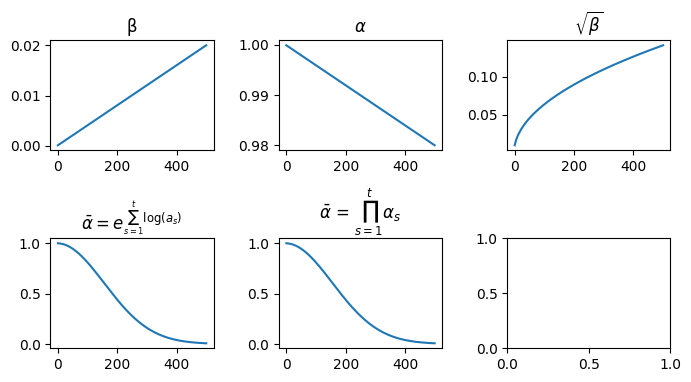

In [9]:
# plot beta, alpha, alphabar, and sigma as subplots
fig, axs = plt.subplots(2, 3, figsize=(8, 4))
axs[0, 0].plot(b_t)
axs[0, 0].set_title('β')
axs[0, 1].plot(a_t)
axs[0, 1].set_title(r'$\alpha$')
axs[0, 2].plot(bsqrt_t)
axs[0, 2].set_title(r'$\sqrt{\beta}$')
axs[1, 0].plot(ab_t)
axs[1, 0].set_title(r'$\bar{\alpha} = e^{\sum_{s=1}^{t} \log(a_{s})}$')
axs[1, 1].plot(alphabar_t)
axs[1, 1].set_title(r'$\bar{\alpha}$ = $\prod_{s=1}^{t} \alpha_s$')

# Adjust the space between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.8)

# Analysis of denoising

In [6]:
# helper function; removes the predicted noise (but adds some noise back in to avoid collapse)
def denoise_add_noise(x, t, pred_noise, z=None):
    if z is None:
        z = torch.randn_like(x) # random numbers from a normal distribution with mean 0 and variance 1
    noise = b_t.sqrt()[t] * z
    mean = (x - pred_noise * ((1 - a_t[t]) / (1 - ab_t[t]).sqrt())) / a_t[t].sqrt()
    return mean + noise

Noise added back 
$$
noise = \sigma_t \times z = \sqrt{\beta_t} \times z,   z \sim \mathcal{N}(0, I)
$$
Mean
$$
\text{mean} = \frac{1}{\sqrt{\alpha_{t}}} \times (x - \text{pred\_noise} \times \left(\frac{1 - \alpha_{t}}{\sqrt{1 - \bar{\alpha}_{t}}}\right))
$$


![image.png](attachment:image.png)